# Decision Tree (의사결정나무)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

- based on CART (Because it is a Python's offical Algorithm)

# Y: Categorical

In [300]:
# csv파일 불러오기
import pandas as pd
titanic_data = pd.read_csv("titanic_data_clean.csv")

In [301]:
titanic_data # 0: DEAD, 1: Survive

,Pclass,Sex,Fare,Survived
0,3,male,7.2500,0
1,1,female,71.2833,1
2,3,female,7.9250,1
3,1,female,53.1000,1
4,3,male,8.0500,0
...,...,...,...,...
886,2,male,13.0000,0
887,1,female,30.0000,1
888,3,female,23.4500,0
889,1,male,30.0000,1


In [302]:
titanic_data.info()
# (0: dead, 1: survived)
# tennis_data.isnull().sum() 결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [303]:
import pandas as pd
titanic_data['Survived'].value_counts() # Y열의 데이터 개수 확인

0    549
1    342
Name: Survived, dtype: int64

In [304]:
# 문자로 된 열을 숫자로 변경해주기
## 여자=0, 남자=1
titanic_data["Sex"] = titanic_data.Sex.map({"female":0, "male":1})

In [305]:
titanic_data

,Pclass,Sex,Fare,Survived
0,3,1,7.2500,0
1,1,0,71.2833,1
2,3,0,7.9250,1
3,1,0,53.1000,1
4,3,1,8.0500,0
...,...,...,...,...
886,2,1,13.0000,0
887,1,0,30.0000,1
888,3,0,23.4500,0
889,1,1,30.0000,1


In [306]:
# Features와 target 나누기
t_features = titanic_data[titanic_data.columns[:-1]]
t_target = titanic_data[titanic_data.columns[-1]]

In [307]:
# One-hot Encoding (decision tree는 비모수적 방법이므로, dummy변수를 하나 제거하는게 아니다! 살린다.)
t_features = pd.get_dummies(data = t_features, columns = ['Pclass'], prefix = 'Pclass')

## 일반적으로 dummy변수를 제거하려면 pd.get_dummies()에 drop_first=True을 넣는다.
### pd.get_dummies(data = feature_data, columns = ['categorical feature'], prefix = 'Categorical feature', drop_first=True)

In [308]:
t_features

,Sex,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,7.2500,0,0,1
1,0,71.2833,1,0,0
2,0,7.9250,0,0,1
3,0,53.1000,1,0,0
4,1,8.0500,0,0,1
...,...,...,...,...,...
886,1,13.0000,0,1,0
887,0,30.0000,1,0,0
888,0,23.4500,0,0,1
889,1,30.0000,1,0,0


In [309]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [310]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

712
712
179
179


In [311]:
import pandas as pd
pd.DataFrame(train_target)['Survived'].value_counts() # Y열의 데이터 개수 확인

0    439
1    273
Name: Survived, dtype: int64

In [312]:
# Under Sampling: Y값을 각각 {0, 1} 239명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=2021)
y_shuffled =sklearn.utils.shuffle(train_target, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

In [313]:
import pandas as pd
pd.DataFrame(train_target_us)['Survived'].value_counts() # Y열의 데이터 개수 확인: total 546명

1    273
0    273
Name: Survived, dtype: int64

### Decision Tree Modeling

In [314]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 2021)
## DecisionTreeClassifier() 괄호 안에 넣을 수 있는 것들:
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_features_us, train_target_us)

In [315]:
tree_fit

DecisionTreeClassifier(random_state=2021)

- 아래 링크에서 graphviz를 다운로드받기. 이것을 설치한 뒤, Graphviz 폴더-bin폴더 주소를 찾아놓자.

http://www.graphviz.org/download/


In [50]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [123]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=a5d86c4a01dcb0c802c2b959d1b53a6d9805627ff5f97744a6c47f6fa9f5e6cf
  Stored in directory: c:\users\hwwoo\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os

- Path (경로)를 바꿔주어야 한다. Graphviz 폴더-bin폴더 주소를 찾자.

In [125]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [209]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead', 'Survive'])

In [210]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장

True

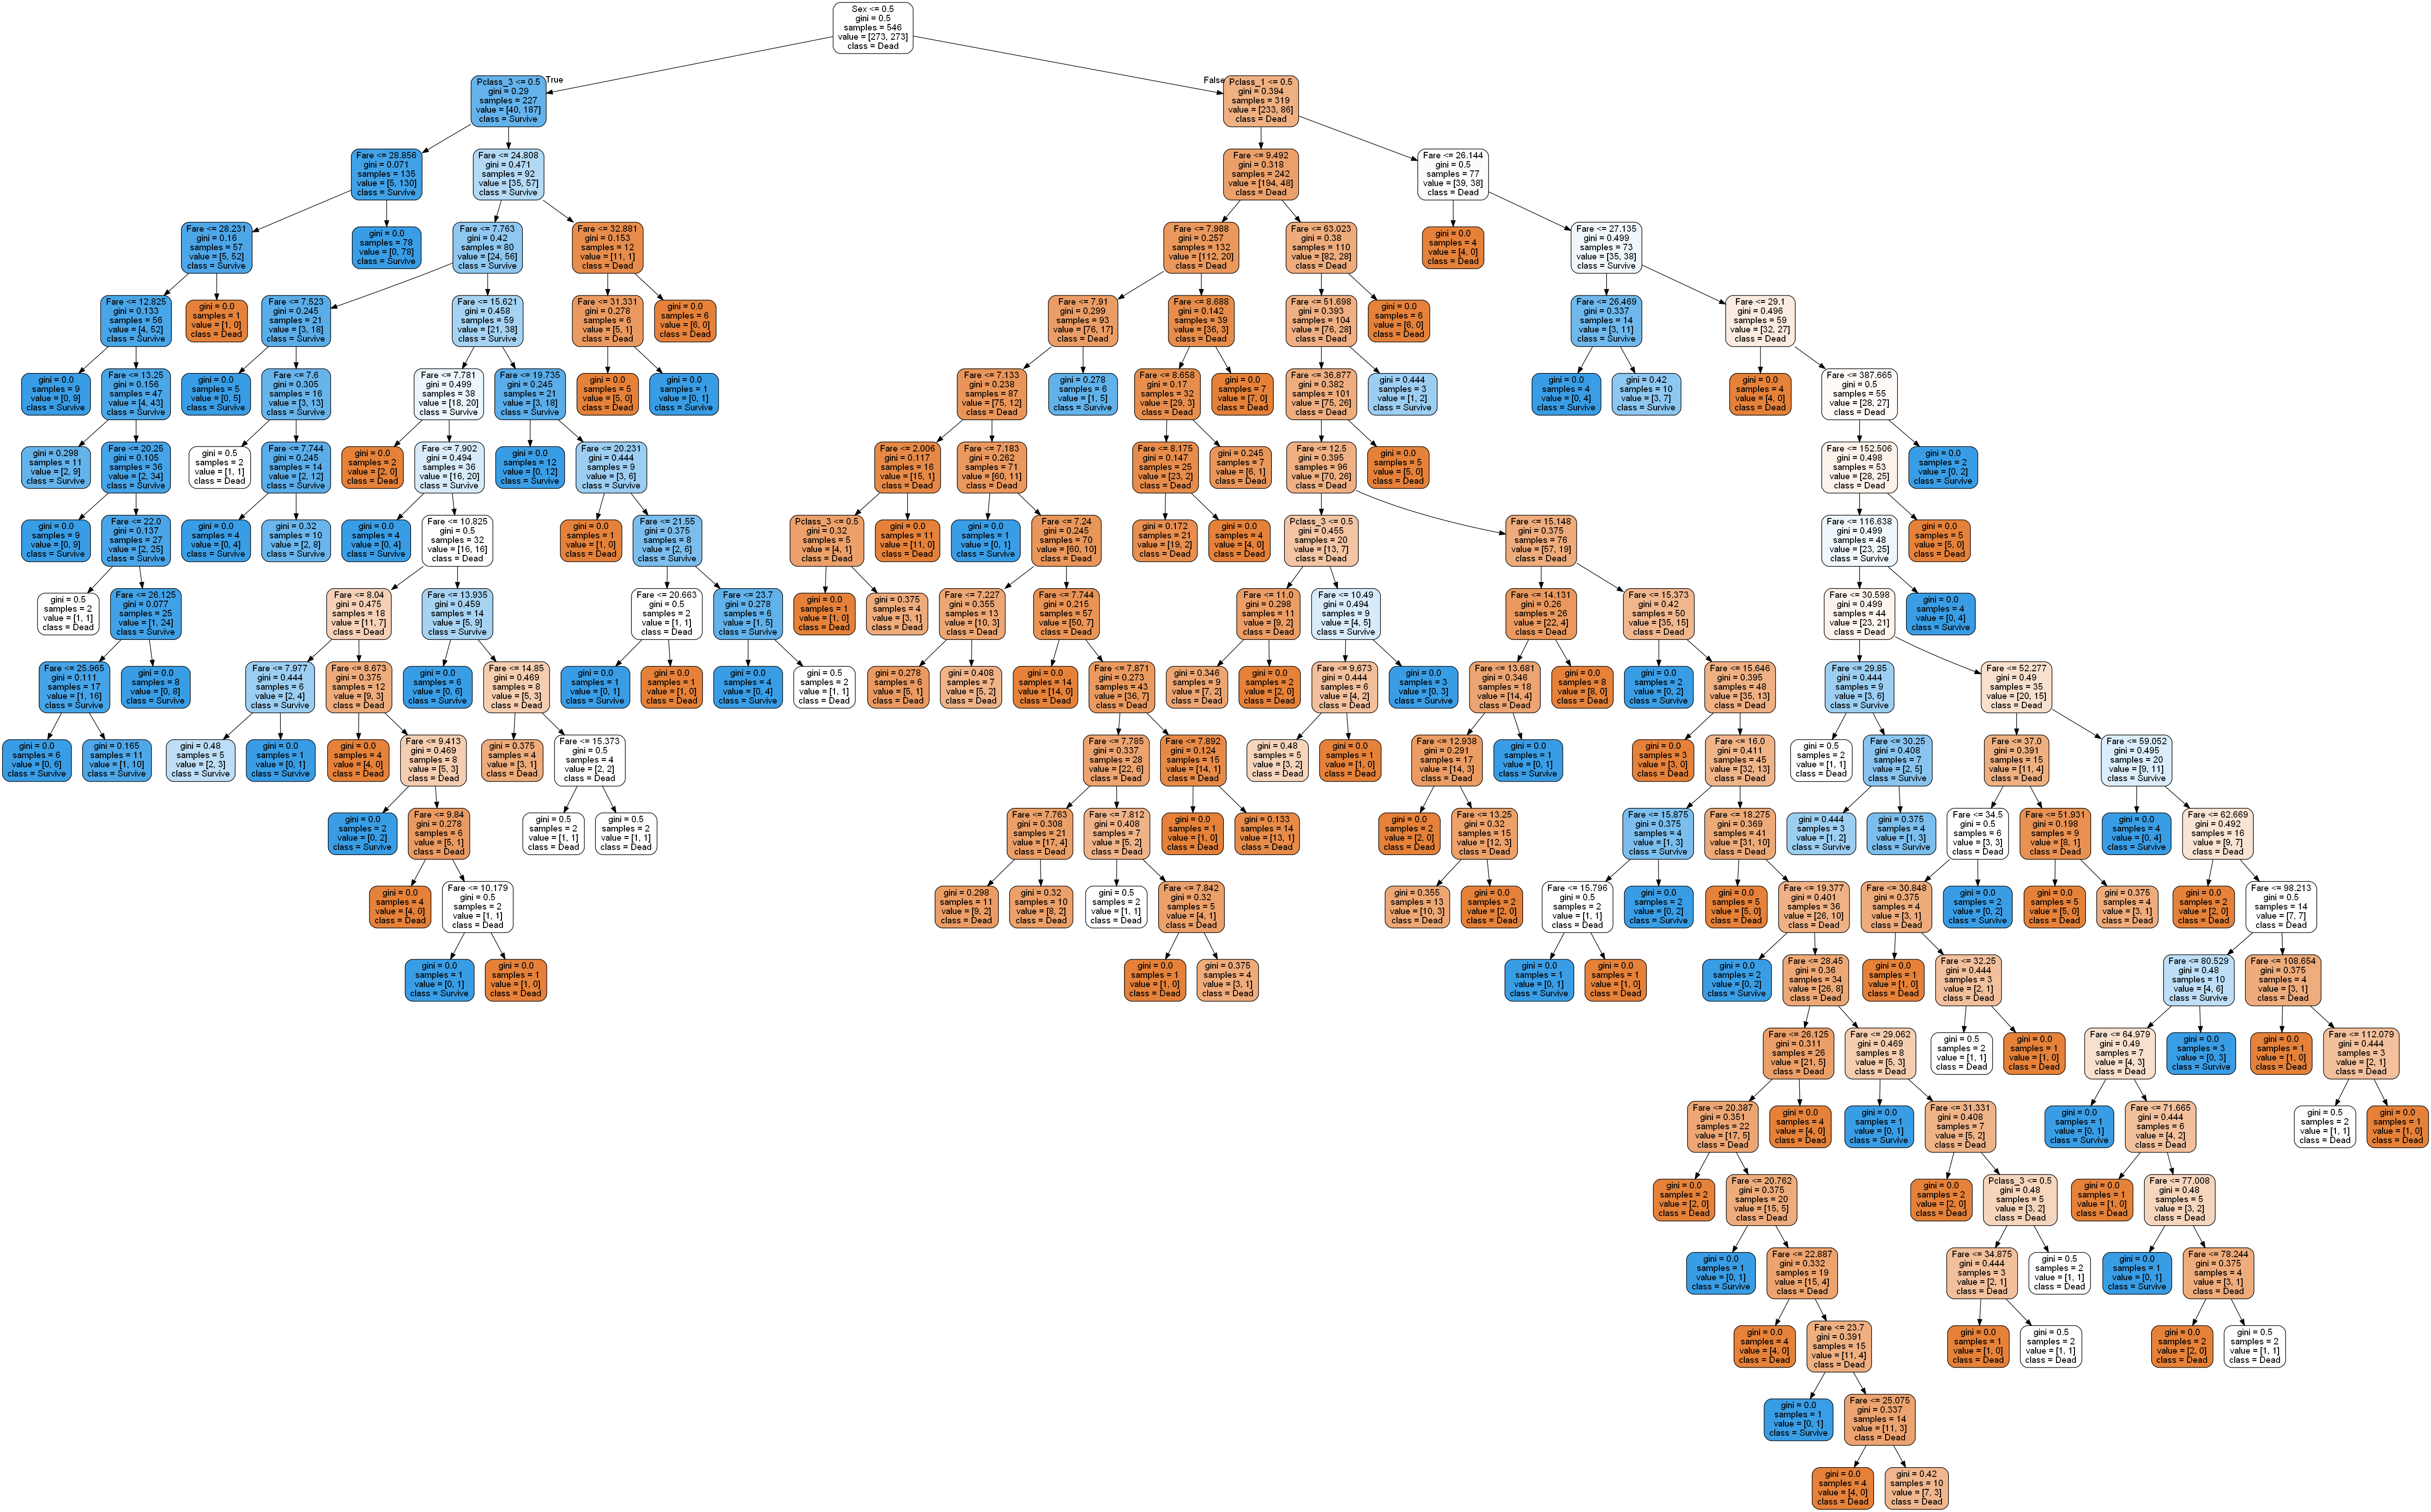

In [211]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [213]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))

CV accuracy: [0.83636364 0.8        0.72727273 0.85454545 0.76363636 0.81818182
 0.7037037  0.85185185 0.81481481 0.85185185]
CV aacuracy(Mean): 0.802 (std: 0.051)


In [214]:
y_pred = tree.predict(test_features)

In [215]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [216]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],91,19
True[1],16,53


In [217]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.74      0.77      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.804
정밀도 precision: 0.736
재현율 recall: 0.768
F1-score: 0.752
AUC: 0.798


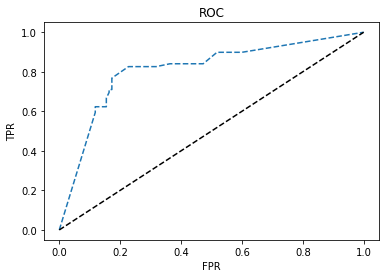

In [219]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

### 최적화

In [316]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [317]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

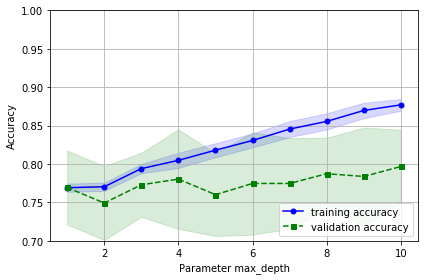

In [224]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 편차가 적은 max_dept = 4 선택

### 하이퍼파라미터 튜닝 - Grid Search

In [318]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_)
print(gs.best_params_)

0.775084175084175
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 10}


In [319]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=2021))])

In [320]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, random_state = 2021)

In [321]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=2021)

In [322]:
y_pred = best_tree.predict(test_features)

In [323]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],87,23
True[1],20,49


In [324]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       110
           1       0.68      0.71      0.70        69

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [325]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.760
정밀도 precision: 0.681
재현율 recall: 0.710
F1-score: 0.695
AUC: 0.751


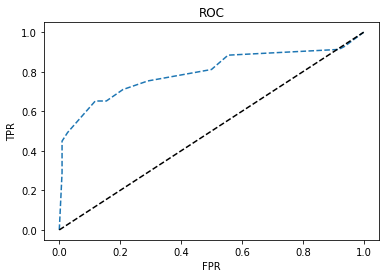

In [326]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [232]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead', 'Survive'])

In [244]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

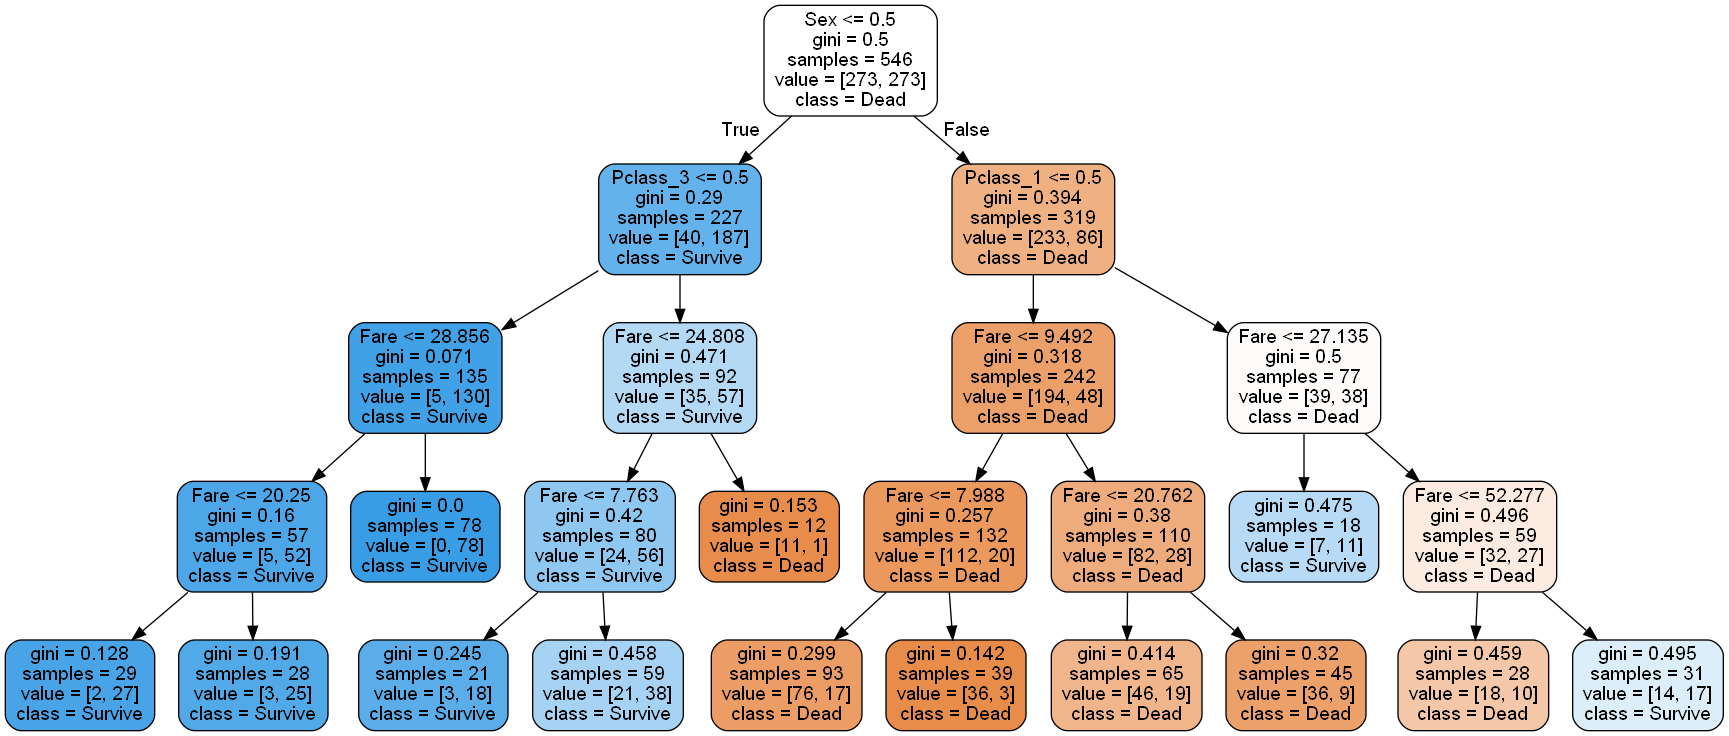

In [245]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

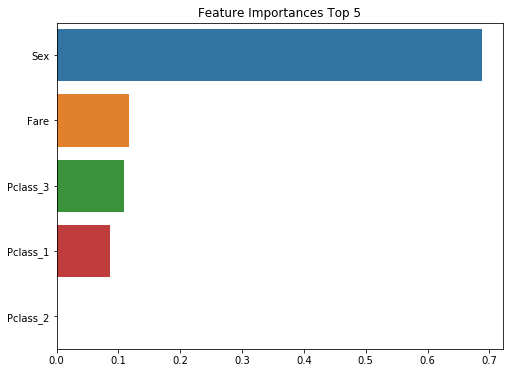

In [327]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [328]:
feature_importances.sort_values(ascending=False)

Sex         0.687435
Fare        0.117796
Pclass_3    0.108886
Pclass_1    0.085883
Pclass_2    0.000000
dtype: float64

# Y: Continuous

In [1]:
# Boston Housing dataset
# data source: https://www.kaggle.com/kyasar/boston-housing
import pandas as pd
df = pd.read_csv("boston_housing.csv")

df

# Features
# crim: Per capita crims rate by town
# chas: Charles River dummy variable (1: tract bounds river, 0: otherwise)
# tax: full-value property-tax rate per $10,000
# lstat: % lower of the population

# Target
# medv: Median value of owner-occupied homes in $1000's

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
## 일부러 편의를 위해 y(target)을 맨 마지막에 작성
data = df.copy().loc[:, ['crim', 'chas', 'tax', 'lstat', 'medv'] ]

In [3]:
data

,crim,chas,tax,lstat,medv
0,0.00632,0,296.0,4.98,24.0
1,0.02731,0,242.0,9.14,21.6
2,0.02729,0,242.0,4.03,34.7
3,0.03237,0,222.0,2.94,33.4
4,0.06905,0,222.0,5.33,36.2
...,...,...,...,...,...
501,0.06263,0,273.0,9.67,22.4
502,0.04527,0,273.0,9.08,20.6
503,0.06076,0,273.0,5.64,23.9
504,0.10959,0,273.0,6.48,22.0


In [4]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]

In [5]:
t_features

,crim,chas,tax,lstat
0,0.00632,0,296.0,4.98
1,0.02731,0,242.0,9.14
2,0.02729,0,242.0,4.03
3,0.03237,0,222.0,2.94
4,0.06905,0,222.0,5.33
...,...,...,...,...
501,0.06263,0,273.0,9.67
502,0.04527,0,273.0,9.08
503,0.06076,0,273.0,5.64
504,0.10959,0,273.0,6.48


In [258]:
# One-hot Encoding (decision tree는 비모수적 방법이므로, dummy변수를 하나 제거하는게 아니다! 살린다.)
# binary라면 그냥 놔두면 됨.
# t_features = pd.get_dummies(data = t_features, columns = ['범주형변수명'], prefix = '범주형변수명')

In [6]:
t_features

,crim,chas,tax,lstat
0,0.00632,0,296.0,4.98
1,0.02731,0,242.0,9.14
2,0.02729,0,242.0,4.03
3,0.03237,0,222.0,2.94
4,0.06905,0,222.0,5.33
...,...,...,...,...
501,0.06263,0,273.0,9.67
502,0.04527,0,273.0,9.08
503,0.06076,0,273.0,5.64
504,0.10959,0,273.0,6.48


In [7]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021)

In [8]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

404
404
102
102


In [9]:
type(train_target)

pandas.core.series.Series

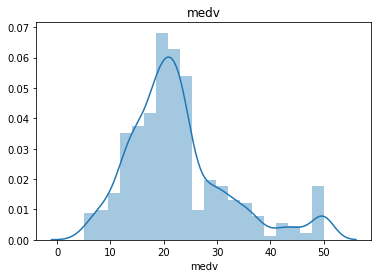

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(pd.DataFrame(train_target).loc[pd.DataFrame(train_target)['medv'].notnull(), 'medv'])
plt.title('medv')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 2021)
## DecisionTreeClassifier() 괄호 안에 넣을 수 있는 것들:
# criterion = 'mse' 또는 'mae' (default='mse')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_features, train_target)

#참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [12]:
tree_fit

DecisionTreeRegressor(random_state=2021)

In [13]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=2021)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [14]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

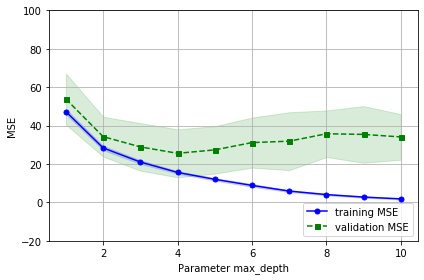

In [28]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MSE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
plt.ylim([-20.00, 100.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 편차가 적은 max_dept = 4 선택

In [35]:
from sklearn.model_selection import GridSearchCV

# parameter선택은 pipe_tree.get_params().keys() 에서 고르기.

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['mse', 'mae'] # 'explained_variance'도 가능

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

# scoring에 대한 추가 설명링크: https://scikit-learn.org/stable/modules/model_evaluation.html

28.454197812256172
{'decisiontreeregressor__criterion': 'mse', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 20}


In [18]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features, train_target)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, min_samples_leaf=20,
                                       random_state=2021))])

In [19]:
best_tree_for_graph = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=20, random_state = 2021)
best_tree_for_graph.fit(train_features, train_target)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20, random_state=2021)

In [20]:
y_pred = best_tree.predict(test_features)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))

# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

R squared: 0.552
MSE: 28.644


In [22]:
import numpy as np
feature_names = train_features.columns.tolist()
target_name = np.array(['medv'])

In [27]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph_best.write_png('tree_best_regression.png') #Tree 이미지를 저장

True

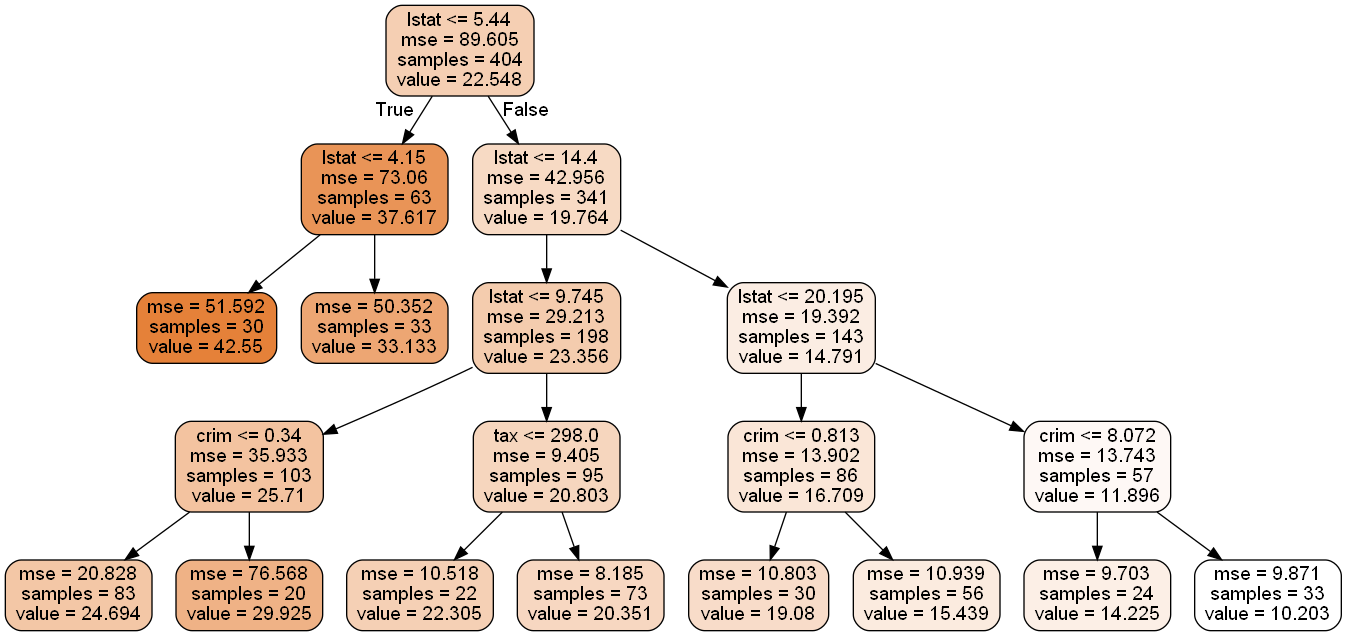

In [28]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

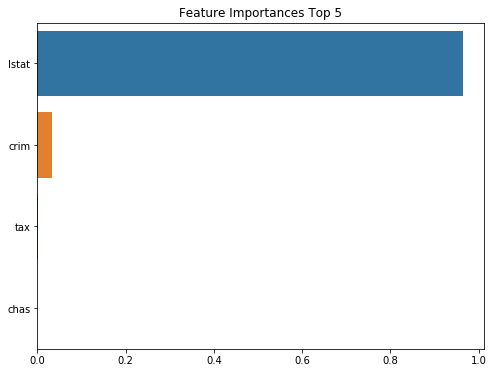

In [29]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [30]:
feature_importances.sort_values(ascending=False)

lstat    0.963905
crim     0.033740
tax      0.002355
chas     0.000000
dtype: float64

## Appendix

In [280]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [189]:
train_result=[]
validation_result=[]
model_criterion=[]
model_max_depth=[]
parameter_min_leaf=[]

insert_criterion=['gini', 'entropy']
max_depth=3
list_min_leaf = [10, 20, 30, 40, 50]
for i in insert_criterion:
    for n in list_min_leaf:
        tree = DecisionTreeClassifier(criterion=i, max_depth=max_depth, min_samples_leaf=n, random_state=2021)
        tree.fit(train_features_us, train_target_us)
        train_result.append(tree.score(train_features_us, train_target_us))
        validation_result.append(tree.score(validation_features, validation_target))
        model_criterion.append(i)
        model_max_depth.append(md)
        parameter_min_leaf.append(n)


result = pd.DataFrame()
result["Criterion"] = model_criterion
result["Depth"] = max_depth
result["MinLeafSize"] = parameter_min_leaf
result["TrainAccuracy"] = train_result
result["ValidationAccuracy"] = validation_result

result

,Criterion,Depth,MinLeafSize,TrainAccuracy,ValidationAccuracy
0,gini,3,10,0.784519,0.817164
1,gini,3,20,0.769874,0.828358
2,gini,3,30,0.763598,0.813433
3,gini,3,40,0.763598,0.813433
4,gini,3,50,0.763598,0.813433
5,entropy,3,10,0.784519,0.817164
6,entropy,3,20,0.769874,0.828358
7,entropy,3,30,0.763598,0.813433
8,entropy,3,40,0.763598,0.813433
9,entropy,3,50,0.763598,0.813433


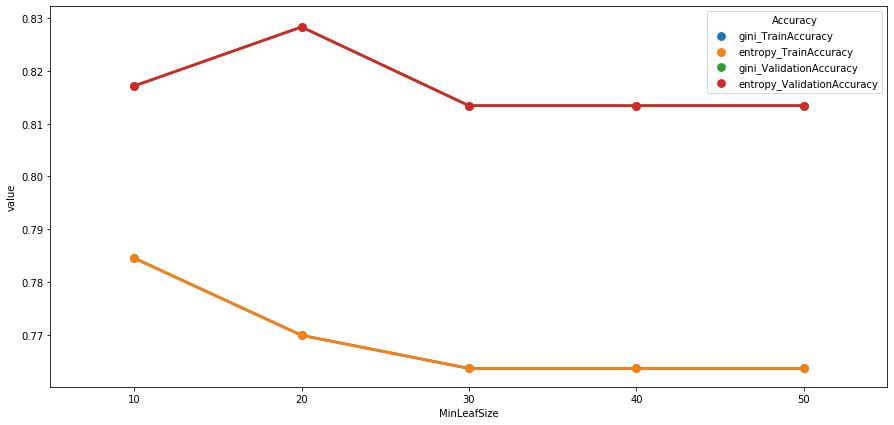

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15,7))
result_melt = pd.melt(result, id_vars=['Criterion', 'Depth', 'MinLeafSize'])
result_melt['Accuracy'] = result_melt['Criterion'] + '_' + result_melt['variable']
sns.pointplot(data = result_melt, x = 'MinLeafSize', y= 'value', hue = 'Accuracy')

참고:

https://jfun.tistory.com/41

https://todayisbetterthanyesterday.tistory.com/38

https://injo.tistory.com/15


https://datascienceschool.net/03%20machine%20learning/12.01%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.html

https://wikidocs.net/50114



https://blog.naver.com/rlacksdid93/221486682771

https://truman.tistory.com/189



https://youtu.be/j-_TDA_nhjE

https://youtu.be/ErmgRBKxfWw

https://youtu.be/mvw1BkoKNhg

https://youtu.be/fBLf3KvYRjE

https://youtu.be/rA35fdkJjN0

https://youtu.be/wbxq3Ap0QWw

https://youtu.be/mQuYrrHdfp0

https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431933811&proxyReferer=https:%2F%2Fwww.google.com%2F



https://datascienceschool.net/03%20machine%20learning/14.01%20%EB%AA%A8%ED%98%95%20%EC%B5%9C%EC%A0%81%ED%99%94.html

https://analysis-flood.tistory.com/68